# Data Wrangling with Python

## A Deep Dive into Data Wrangling with Python

In this section, we will be learning to perform the following using Pandas and NumPy.

* Perform subsetting, filtering, and grouping on pandas DataFrames
* Apply Boolean filtering and indexing from a DataFrame to choose specific elements
* Perform JOIN operations in pandas that are analogous to the SQL command
* Identify missing or corrupted data and choose to drop or apply imputation techniques on missing or corrupted data

### Subsetting, Filtering and Grouping

One of the most important aspects of data wrangling is to curate the data carefully from the deluge of streaming data that pours into an organization or business entity from various sources.

#### Loading and Examining a Superstore's Sales Data from an Excel File

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_excel("data/Sample_Superstore.xls")
print(f"Dataset:\n")
display(df.head())
print(f"Shape pre drop: {df.shape}")

# Remove unused row id column
df.drop('Row ID', axis=1, inplace=True)
print(f"Shape post drop: {df.shape}")

Dataset:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Shape pre drop: (9994, 21)
Shape post drop: (9994, 20)


#### SUBSETTING THE DATAFRAME

Subsetting involves the extraction of partial data based on specific columns and rows, as per business needs.

The `loc` method can be used to index a dataset by the name of the columns and index of the rows.

In [2]:
df_subset = df.loc[
    [i for i in range(5, 10)],
    ['Customer ID', 'Customer Name', 'City', 'Postal Code', 'Sales']
]

df_subset

,Customer ID,Customer Name,City,Postal Code,Sales
5,BH-11710,Brosina Hoffman,Los Angeles,90032,48.860
6,BH-11710,Brosina Hoffman,Los Angeles,90032,7.280
7,BH-11710,Brosina Hoffman,Los Angeles,90032,907.152
8,BH-11710,Brosina Hoffman,Los Angeles,90032,18.504
9,BH-11710,Brosina Hoffman,Los Angeles,90032,114.900


#### Example user case of subsetting to determine statistics on sales and profit

In [3]:
df_subset = df.loc[
    [i for i in range(100, 200)],
    ['Sales', 'Profit']
]

df_subset.describe()

,Sales,Profit
count,100.000000,100.000000
mean,262.957220,0.347574
std,858.983762,170.744869
min,1.788000,-1359.992000
25%,21.327000,1.635900
50%,66.960000,9.653600
75%,177.095000,23.458800
max,8159.952000,585.552000


#### Unique Function

Function that scans data quickly and extract only unique values ina column or row.

In [4]:
print(f"Unique states:\n{df['State'].unique()}")
print(f"\nUnique states count: {df['State'].nunique()}")

Unique states:
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']

Unique states count: 49


#### Conditional selection and boolean filtering

In [5]:
# create a subset of the original dataset for conditional 
df_subset = df.loc[
    [i for i in range(10)],
    ['Ship Mode', 'State', 'Sales']
]
display(df_subset)

,Ship Mode,State,Sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
2,Second Class,California,14.6200
3,Standard Class,Florida,957.5775
4,Standard Class,Florida,22.3680
5,Standard Class,California,48.8600
6,Standard Class,California,7.2800
7,Standard Class,California,907.1520
8,Standard Class,California,18.5040
9,Standard Class,California,114.9000


In [6]:
# filter data to return only Sales < $100
display(df_subset[df_subset['Sales']>100])

# filter data tor return only State != Colorado and Sales > 100
display(df_subset[(df_subset['State'] != 'Colorado') & (df_subset['Sales']>100)])



,Ship Mode,State,Sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
3,Standard Class,Florida,957.5775
7,Standard Class,California,907.1520
9,Standard Class,California,114.9000


,Ship Mode,State,Sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
3,Standard Class,Florida,957.5775
7,Standard Class,California,907.1520
9,Standard Class,California,114.9000


#### Setting and resettting the index

In [7]:
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = [ 'A', 'B', 'C', 'D', 'E' ]
column_headings = [ 'Age', 'Height', 'Weight' ]
df1 = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)

print("\nThe DataFrame\n", "-" * 25, sep="")
display(df1)

print("\nAfter resetting index\n", "-" * 35, sep="")
display(df1.reset_index())

print("\nAfter resetting index with 'drop' option TRUE\n", "-" * 45, sep="")
display(df1.reset_index(drop=True))

print("\nAdding a new column 'Profession'\n", "-" * 45, sep="")
df1['Profession'] = "Student Teacher Engineer Doctor Nurse".split()
display(df1)

print("\nSetting 'Profession' column as index\n", "-" * 45, sep="")
display(df1.set_index('Profession'))



The DataFrame
-------------------------


,Age,Height,Weight
A,22,66,140
B,42,70,148
C,30,62,125
D,35,68,160
E,25,62,152



After resetting index
-----------------------------------


,index,Age,Height,Weight
0,A,22,66,140
1,B,42,70,148
2,C,30,62,125
3,D,35,68,160
4,E,25,62,152



After resetting index with 'drop' option TRUE
---------------------------------------------


,Age,Height,Weight
0,22,66,140
1,42,70,148
2,30,62,125
3,35,68,160
4,25,62,152



Adding a new column 'Profession'
---------------------------------------------


,Age,Height,Weight,Profession
A,22,66,140,Student
B,42,70,148,Teacher
C,30,62,125,Engineer
D,35,68,160,Doctor
E,25,62,152,Nurse



Setting 'Profession' column as index
---------------------------------------------


,Age,Height,Weight
Profession,,,
Student,22,66,140
Teacher,42,70,148
Engineer,30,62,125
Doctor,35,68,160
Nurse,25,62,152


#### The Groupby method

Group by refers to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [8]:
df_subset = df.loc[
    [i for i in range(10)],
    [ 'Ship Mode', 'State', 'Sales' ]
]

byState = df_subset.groupby('State')
print("\nGrouping by 'State' column and listing mean sales\n", "-" * 50, sep='')

display(byState.mean())

print("\nGrouping by 'State' column and listing total sum of sales\n", "-" * 50, sep="")
display(byState.sum())

pd.DataFrame(byState.describe().loc['California'])

df_subset.groupby('Ship Mode').describe().loc[
    ['Second Class', 'Standard Class']
]

byStateCity = df.groupby([ 'State', 'City' ])
byStateCity.describe()['Sales']


Grouping by 'State' column and listing mean sales
--------------------------------------------------


,Sales
State,
California,185.219333
Florida,489.972750
Kentucky,496.950000



Grouping by 'State' column and listing total sum of sales
--------------------------------------------------


,Sales
State,
California,1111.3160
Florida,979.9455
Kentucky,993.9000


count         mean          std       min  \
State         City                                                       
Alabama       Auburn           6.0   294.471667   361.914543     3.760   
              Decatur         13.0   259.601538   385.660903    14.940   
              Florence         5.0   399.470000   796.488863     4.980   
              Hoover           4.0   131.462500   230.646923     7.160   
              Huntsville      10.0   248.437000   419.576667     3.620   
              Mobile          11.0   496.635455   914.087425     8.960   
              Montgomery      10.0   372.273000   475.397645    10.160   
              Tuscaloosa       2.0    87.850000    76.523096    33.740   
Arizona       Avondale         6.0   157.801333   288.247527    14.576   
              Bullhead City    2.0    11.144000     4.559425     7.920   
              Chandler         7.0   153.821000   305.283748     8.544   
              Gilbert         15.0   278.158800   346.945589     5.904   
              Glendale        23.0   126.863696   225.003236     2.368   
              Mesa            28.0   144.205000   155.275947     4.368   
              Peoria          16.0    83.834500    88.768365     4.536   
              Phoenix         63.0   174.607254   322.324198     1.408   
              Scottsdale      12.0   122.192250   103.500825     4.401   
              Sierra Vista     3.0    25.357333     9.543341    14.368   
              Tempe           13.0    82.330923   119.755669     3.366   
              Tucson          32.0   197.281750   242.004135     4.272   
              Yuma             4.0   210.216250   270.654379    10.496   
Arkansas      Conway           1.0   301.960000          NaN   301.960   
              Fayetteville    14.0   267.343571   482.533092     6.240   
              Hot Springs      4.0    61.457500    65.669769    25.920   
              Jonesboro       11.0   265.029091   366.221274     6.630   
              Little Rock     24.0   148.347917   206.445952    11.160   
              Pine Bluff       2.0   106.455000   132.221897    12.960   
              Rogers           1.0    40.410000          NaN    40.410   
              Springdale       1.0     4.300000          NaN     4.300   
              Texarkana        2.0   327.120000   393.462497    48.900   
...                            ...          ...          ...       ...   
Washington    Bellingham       3.0  1263.413333  1327.859461    25.120   
              Covington        4.0   103.420000    93.849114    29.900   
              Des Moines       7.0   493.491143   665.676105    18.540   
              Edmonds         14.0   180.263714   344.045236     7.380   
              Everett          1.0     3.856000          NaN     3.856   
              Kent             8.0   168.906750   257.793525    19.440   
              Longview         3.0    39.736667    31.681749    18.240   
              Marysville       2.0    51.090000    59.778807     8.820   
              Olympia          5.0   204.089600   236.364267    14.030   
              Pasco            6.0   366.852000   356.325643     5.880   
              Redmond          3.0    18.410000     5.473783    12.320   
              Renton           3.0   414.210667   544.196636    51.840   
              Seattle        428.0   279.300799   823.990115     1.344   
              Spokane          7.0   289.702571   300.735758    23.840   
              Vancouver        5.0   137.367200   157.470820     9.640   
West Virginia Wheeling         4.0   302.456000   313.508627     6.240   
Wisconsin     Appleton         2.0   835.655000  1151.304190    21.560   
              Eau Claire       6.0   274.275000   237.093940    32.560   
              Franklin         9.0   530.472222   715.606149     3.600   
              Green Bay        4.0   131.830000   224.726888    16.740   
              Kenosha          9.0   434.081111   301.753460    14.980   
              La Crosse        5.

#### Detecting Outliers and Handling Missing Values

In [9]:
df_missing = pd.read_excel("data/Sample_Superstore.xls", sheet_name="Missing")

# show missing values
display(df_missing.isnull())

# get missing values count per column
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss > 0:
        print(f"{c} has missing value(s) {miss}")
    else:
        print(f"{c} has NO missing value(s)!")

,Customer,Product,Sales,Quantity,Discount,Profit
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,True,False,False,False,True
8,True,False,False,False,False,False
9,False,False,False,False,False,False


Customer has missing value(s) 1
Product has missing value(s) 2
Sales has missing value(s) 1
Quantity has missing value(s) 1
Discount has NO missing value(s)!
Profit has missing value(s) 1


#### Filling in the missing values with FILLNA

The fillna method provides the ability to fill columns containing missing values. But it works only on string data and not numerical columns that can contain integers, floats, etc. So its usage should be restricted to string columns

In [10]:
# Fill all missing values with the string "FILL"
display(df_missing.fillna('FILL'))

# Fill missing values of specific columns with the string "FILL"
display(df_missing[[ 'Customer', 'Product' ]].fillna('FILL'))

# forward or ffil to fill forwards
display(df_missing['Sales'].fillna(method='ffill'))

# backward or bfill to fill backwards
display(df_missing['Sales'].fillna(method='bfill'))

# fill using average
display(df_missing['Sales'].fillna(df_missing.mean()['Sales']))

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,FILL,1706.18,9,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4,0.2,68.3568
2,Zuschuss Donatelli,Art,8.56,2,0.0,2.4824
3,Zuschuss Donatelli,Phones,FILL,3,0.2,16.011
4,Zuschuss Donatelli,Binders,22.72,4,0.2,7.384
5,Eric Hoffmann,Binders,11.648,FILL,0.2,4.2224
6,Eric Hoffmann,Accessories,90.57,3,0.0,11.7741
7,Ruben Ausman,FILL,77.88,2,0.0,FILL
8,FILL,Accessories,13.98,2,0.0,6.1512
9,Kunst Miller,Binders,25.824,6,0.2,9.3612


,Customer,Product
0,Brosina Hoffman,FILL
1,Brosina Hoffman,Phones
2,Zuschuss Donatelli,Art
3,Zuschuss Donatelli,Phones
4,Zuschuss Donatelli,Binders
5,Eric Hoffmann,Binders
6,Eric Hoffmann,Accessories
7,Ruben Ausman,FILL
8,FILL,Accessories
9,Kunst Miller,Binders


0     1706.184
1      911.424
2        8.560
3        8.560
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

0     1706.184
1      911.424
2        8.560
3       22.720
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

0     1706.184
1      911.424
2        8.560
3      301.552
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

> Note fillna creates and manipulates a new copy of the dataframe. The inplace parameter must be set to True to manipulate the supplied dataframe

#### Dropping missing values with dropna

This function is used to drop rows or columns that contain NaN/ missing values. If axis is set to zero, the rows containing missing values are dropped. If it is set to one, then columns containing missing values are dropped.

It has two arguements that are very useful for data wrangling
- *how* argument determines if a row or column is removed from a DataFrame, when we have at least one NaN or all NaNs
- *thresh* argument specifies the number of non-NaN values to keep the row/column

In [11]:
# drop all rows with missing values
display(df_missing.dropna(axis=0))

# drop all columns with missing values
display(df_missing.dropna(axis=1))

# drop all columns with missing values after it finds more than 3 missing values
display(df_missing.dropna(axis=1, thresh=3))

,Customer,Product,Sales,Quantity,Discount,Profit
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


,Discount
0,0.2
1,0.2
2,0.0
3,0.2
4,0.2
5,0.2
6,0.0
7,0.0
8,0.0
9,0.2


,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
7,Ruben Ausman,NaN,77.880,2.0,0.0,NaN
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


> Note dropna creates and manipulates a new copy of the dataframe. The inplace parameter must be set to True to manipulate the supplied dataframe

##### Outlier detection using a simple statistical test

In [12]:
df_sample = df[['Customer Name', 'State', 'Sales', 'Profit']].sample(n=50).copy()

df_sample['Sales'].iloc[5] = -1000.0
df_sample['Sales'].iloc[15] = -500.0

/Volumes/apfs_256gb/Personal/Technology/conda/data-engineering/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


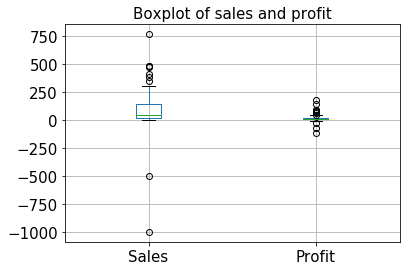

In [13]:
# boxplot
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

#### Concatenating, Merging and Joining
Pandas provides built-in methods to perform merging or joining multiple DataFrame objects similar to SQL JOINs.

It also provides methods to concatenate different dataframes into a single dataframe.

In [14]:
# generate 3 different dataframes of 4 records each
df_1 = df[['Customer Name', 'State', 'Sales', 'Profit']].sample(n=4)
df_2 = df[['Customer Name', 'State', 'Sales', 'Profit']].sample(n=4)
df_3 = df[['Customer Name', 'State', 'Sales', 'Profit']].sample(n=4)

# concatenation of rows
df_cat1 = pd.concat([df_1, df_2, df_3], axis=0)
display(df_cat1)

# concatenation of columns
df_cat2 = pd.concat([df_1, df_2, df_3], axis=1)
display(df_cat2)

,Customer Name,State,Sales,Profit
1089,Lindsay Williams,North Carolina,31.984,1.9990
8358,Michelle Moray,Montana,105.584,9.2386
627,Annie Thurman,Washington,97.160,28.1764
7324,Carlos Soltero,New York,9.450,4.5360
1820,Erin Ashbrook,Illinois,92.064,-225.5568
6173,Nick Zandusky,Missouri,21.200,9.1160
1696,Phillina Ober,New Jersey,104.980,52.4900
8019,Nora Paige,Missouri,83.900,20.9750
2099,Ruben Dartt,Oregon,279.944,80.4839
1935,Lindsay Williams,California,166.160,59.8176


,Customer Name,State,Sales,Profit,Customer Name,State,Sales,Profit,Customer Name,State,Sales,Profit
627,Annie Thurman,Washington,97.160,28.1764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1089,Lindsay Williams,North Carolina,31.984,1.9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,NaN,NaN,NaN,NaN,Phillina Ober,New Jersey,104.980,52.4900,NaN,NaN,NaN,NaN
1820,NaN,NaN,NaN,NaN,Erin Ashbrook,Illinois,92.064,-225.5568,NaN,NaN,NaN,NaN
1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lindsay Williams,California,166.160,59.8176
2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ruben Dartt,Oregon,279.944,80.4839
4610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joel Eaton,California,47.120,20.7328
6173,NaN,NaN,NaN,NaN,Nick Zandusky,Missouri,21.200,9.1160,NaN,NaN,NaN,NaN
7324,Carlos Soltero,New York,9.450,4.5360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8019,NaN,NaN,NaN,NaN,Nora Paige,Missouri,83.900,20.9750,NaN,NaN,NaN,NaN


##### Merging by a common key

In [15]:
df_1 = df[
    ['Ship Date', 'Ship Mode', 'Customer Name']
][0:4]
display(df_1)

df_2 = df[
    ['Customer Name', 'Product Name', 'Quantity']
][0:4]
display(df_2)

# joining dataframes
display(pd.merge(df_1, df_2, on='Customer Name', how='inner'))
# drop duplicates
display(pd.merge(df_1, df_2, on='Customer Name', how='inner').drop_duplicates())

df_3 = df[
    ['Customer Name', 'Product Name', 'Quantity']
][2:6]
display(df_3)

# inner join with records missing in either dataframes
display(pd.merge(df_1, df_3, on='Customer Name', how='inner').drop_duplicates())

# outer join with records missing in either dataframes
display(pd.merge(df_1, df_3, on='Customer Name', how='outer').drop_duplicates())



,Ship Date,Ship Mode,Customer Name
0,2016-11-11,Second Class,Claire Gute
1,2016-11-11,Second Class,Claire Gute
2,2016-06-16,Second Class,Darrin Van Huff
3,2015-10-18,Standard Class,Sean O'Donnell


,Customer Name,Product Name,Quantity
0,Claire Gute,Bush Somerset Collection Bookcase,2
1,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


,Ship Date,Ship Mode,Customer Name,Product Name,Quantity
0,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
1,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
3,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
4,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
5,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


,Ship Date,Ship Mode,Customer Name,Product Name,Quantity
0,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
1,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
4,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
5,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


,Customer Name,Product Name,Quantity
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
4,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
5,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


,Ship Date,Ship Mode,Customer Name,Product Name,Quantity
0,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
1,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
2,2015-10-18,Standard Class,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2


,Ship Date,Ship Mode,Customer Name,Product Name,Quantity
0,2016-11-11,Second Class,Claire Gute,NaN,NaN
2,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2.0
3,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5.0
4,2015-10-18,Standard Class,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2.0
5,NaT,NaN,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7.0


##### The join method

Joining is performed based on __index keys__ and is done by combining the columns of two potentially different indexed DataFrames into a single one. It is faster due to the use of row indices.

In [16]:
df_1 = df[
    ['Ship Date', 'Ship Mode', 'Customer Name']
][0:4]
df_1.set_index(['Customer Name'], inplace=True)
display(df_1)

df_2 = df[
    ['Product Name', 'Quantity', 'Customer Name']
][2:6]
df_2.set_index(['Customer Name'], inplace=True)
display(df_2)

# left join
display(df_1.join(df_2, how='left').drop_duplicates())
# right join
display(df_1.join(df_2, how='right').drop_duplicates())
# inner join
display(df_1.join(df_2, how='inner').drop_duplicates())
# outer join
display(df_1.join(df_2, how='outer').drop_duplicates())


,Ship Date,Ship Mode
Customer Name,,
Claire Gute,2016-11-11,Second Class
Claire Gute,2016-11-11,Second Class
Darrin Van Huff,2016-06-16,Second Class
Sean O'Donnell,2015-10-18,Standard Class


,Product Name,Quantity
Customer Name,,
Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


,Ship Date,Ship Mode,Product Name,Quantity
Customer Name,,,,
Claire Gute,2016-11-11,Second Class,NaN,NaN
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2.0
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5.0
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2.0


,Ship Date,Ship Mode,Product Name,Quantity
Customer Name,,,,
Brosina Hoffman,NaT,NaN,Eldon Expressions Wood and Plastic Desk Access...,7
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2


,Ship Date,Ship Mode,Product Name,Quantity
Customer Name,,,,
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2


,Ship Date,Ship Mode,Product Name,Quantity
Customer Name,,,,
Brosina Hoffman,NaT,NaN,Eldon Expressions Wood and Plastic Desk Access...,7.0
Claire Gute,2016-11-11,Second Class,NaN,NaN
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2.0
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5.0
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2.0


#### Useful methods of Pandas

##### Randomized sampling
Randomly choose a controlled fraction of the DataFrame

In [17]:
# get a number of samples
display(df.sample(n=5))

# get a definite fraction (percentage) of samples
display(df.sample(frac=0.1))

# get a definite fraction (percentage) of samples with repetition. (Default is no repetition)
display(df.sample(frac=0.1, replace=True))

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3572,US-2017-126081,2017-06-29,2017-07-04,Standard Class,FC-14335,Fred Chung,Corporate,United States,Mesquite,Texas,75150,Central,OFF-PA-10003953,Office Supplies,Paper,Xerox 218,5.184,1,0.2,1.8144
350,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560,2,0.0,11.5432
7685,CA-2015-116876,2015-02-14,2015-02-21,Standard Class,TT-21070,Ted Trevino,Consumer,United States,Rochester,New York,14609,East,TEC-PH-10002584,Technology,Phones,Samsung Galaxy S4,625.990,1,0.0,187.7970
4054,CA-2014-122931,2014-09-29,2014-10-03,Standard Class,SM-20950,Suzanne McNair,Corporate,United States,Philadelphia,Pennsylvania,19134,East,OFF-PA-10000533,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,20.928,4,0.2,6.8016
7445,CA-2017-127474,2017-02-03,2017-02-07,Second Class,RD-19810,Ross DeVincentis,Home Office,United States,Chicago,Illinois,60610,Central,OFF-PA-10001033,Office Supplies,Paper,Xerox 1893,65.584,2,0.2,23.7742


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1411,CA-2016-136329,2016-07-09,2016-07-13,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,New York,10035,East,FUR-CH-10002335,Furniture,Chairs,Hon GuestStacker Chair,408.006,2,0.1,72.5344
9812,CA-2016-117583,2016-11-27,2016-11-30,First Class,CB-12025,Cassandra Brandow,Consumer,United States,East Orange,New Jersey,7017,East,OFF-AR-10000658,Office Supplies,Art,Newell 324,34.650,3,0.0,9.7020
4915,CA-2015-161830,2015-09-24,2015-09-26,Second Class,ME-17725,Max Engle,Consumer,United States,Seattle,Washington,98105,West,OFF-BI-10001097,Office Supplies,Binders,Avery Hole Reinforcements,14.952,3,0.2,5.4201
7047,CA-2014-150581,2014-04-08,2014-04-12,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,Concord,California,94521,West,TEC-AC-10001908,Technology,Accessories,Logitech Wireless Headset h800,399.960,4,0.0,139.9860
8464,CA-2015-144043,2015-05-10,2015-05-15,Standard Class,AB-10165,Alan Barnes,Consumer,United States,Louisville,Colorado,80027,West,TEC-AC-10002718,Technology,Accessories,Belkin Standard 104 key USB Keyboard,46.688,4,0.2,-2.9180
3709,CA-2014-120544,2014-11-23,2014-11-27,Standard Class,SS-20140,Saphhira Shifley,Corporate,United States,Mesquite,Texas,75150,Central,TEC-AC-10003709,Technology,Accessories,Maxell 4.7GB DVD-R 5/Pack,5.544,7,0.2,1.6632
8143,CA-2016-100993,2016-02-05,2016-02-10,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,California,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716
9159,CA-2016-118934,2016-08-09,2016-08-14,Standard Class,GH-14410,Gary Hansen,Home Office,United States,Hendersonville,Tennessee,37075,South,OFF-BI-10003314,Office Supplies,Binders,Tuff Stuff Recycled Round Ring Binders,4.338,3,0.7,-3.0366
7053,CA-2016-165330,2016-12-11,2016-12-11,Same Day,WB-21850,William Brown,Consumer,United States,Anaheim,California,92804,West,TEC-AC-10000057,Technology,Accessories,Microsoft Natural Ergonomic Keyboard 4000,119.960,4,0.0,25.1916
4622,CA-2017-147228,2017-09-09,2017-09-14,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401,South,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,8.832,3,0.2,-1.9872


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2260,CA-2015-117611,2015-11-08,2015-11-10,Second Class,MZ-17335,Maria Zettner,Home Office,United States,San Diego,California,92024,West,TEC-AC-10002049,Technology,Accessories,Logitech G19 Programmable Gaming Keyboard,371.970,3,0.0,66.9546
9923,CA-2015-159534,2015-03-20,2015-03-23,First Class,DH-13075,Dave Hallsten,Corporate,United States,New York City,New York,10035,East,OFF-BI-10003982,Office Supplies,Binders,Wilson Jones Century Plastic Molded Ring Binders,49.848,3,0.2,16.8237
322,CA-2014-156601,2014-09-19,2014-09-24,Standard Class,FA-14230,Frank Atkinson,Corporate,United States,Long Beach,California,90805,West,OFF-FA-10000624,Office Supplies,Fasteners,OIC Binder Clips,7.160,2,0.0,3.5800
8354,CA-2017-132199,2017-05-03,2017-05-08,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Philadelphia,Pennsylvania,19134,East,OFF-BI-10002133,Office Supplies,Binders,"Wilson Jones Elliptical Ring 3 1/2"" Capacity B...",64.200,5,0.7,-44.9400
3630,CA-2017-155957,2017-11-26,2017-11-30,Standard Class,CC-12610,Corey Catlett,Corporate,United States,Columbus,Ohio,43229,East,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,213.136,7,0.2,23.9778
1201,CA-2016-114727,2016-07-18,2016-07-24,Standard Class,LS-16945,Linda Southworth,Corporate,United States,Denver,Colorado,80219,West,OFF-BI-10004967,Office Supplies,Binders,Round Ring Binders,1.872,3,0.7,-1.4352
603,CA-2014-149958,2014-03-15,2014-03-19,Standard Class,AS-10240,Alan Shonely,Consumer,United States,Tampa,Florida,33614,South,FUR-FU-10001756,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Photo F...",45.696,3,0.2,5.1408
992,CA-2016-105585,2016-08-26,2016-08-27,First Class,RF-19735,Roland Fjeld,Consumer,United States,San Jose,California,95123,West,OFF-FA-10002983,Office Supplies,Fasteners,Advantus SlideClip Paper Clips,10.230,3,0.0,4.9104
1856,US-2017-158218,2017-05-12,2017-05-15,Second Class,AC-10420,Alyssa Crouse,Corporate,United States,Houston,Texas,77041,Central,OFF-ST-10000563,Office Supplies,Storage,Fellowes Bankers Box Stor/Drawer Steel Plus,127.920,5,0.2,-15.9900
1308,CA-2016-141397,2016-06-20,2016-06-21,First Class,RC-19825,Roy Collins,Consumer,United States,Pasadena,California,91104,West,OFF-AP-10003971,Office Supplies,Appliances,Belkin 6 Outlet Metallic Surge Strip,21.780,2,0.0,5.6628


##### Value Counts

This function returns an object all containing unique counts of values in a column of the DataFrame. The difference with unique is that unique only returns the values with the count of each value. value_counts also sorts the series of counts of the unique values by the frequency of the count.

In [18]:
display(df['Customer Name'].value_counts()[:10])

William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Chloris Kastensmidt    32
Edward Hooks           32
Seth Vernon            32
Jonathan Doherty       32
Zuschuss Carroll       31
Emily Phan             31
Name: Customer Name, dtype: int64

##### Pivot Table functionality

In [19]:
df_sample = df.sample(n=100)

df_sample.pivot_table(values=['Sales', 'Quantity','Profit'], index=['Region', 'State'], aggfunc='mean')

Profit  Quantity       Sales
Region  State                                           
Central Illinois        -80.778000  4.000000   53.072000
        Indiana          63.404700  2.500000  132.185000
        Michigan         18.032650  2.000000  196.085000
        Minnesota        73.932100  3.500000  204.105000
        Oklahoma          1.743400  1.000000    6.640000
        Texas           -13.806500  3.875000  264.452000
        Wisconsin        76.087800  6.000000  185.580000
East    Connecticut      40.700867  3.000000  276.210000
        Delaware         33.339600  6.000000   68.040000
        Massachusetts     8.726400  4.500000   18.360000
        New Hampshire    11.827200  8.000000   24.640000
        New Jersey        9.702000  3.000000   34.650000
        New York          2.229600  3.000000   40.198800
        Ohio            -20.112967  2.222222   92.706667
        Pennsylvania      0.358400  4.166667   67.894667
        Rhode Island      9.492400  2.000000   49.960000
South   Alabama          33.995000  2.000000  135.980000
        Arkansas          2.999000  1.000000   29.990000
        Florida          -9.402000  3.500000   95.306250
        Georgia           7.018400  3.500000   18.080000
        Kentucky         26.819850  3.000000   56.835000
        Louisiana        10.789200  2.000000   29.160000
        Mississippi     197.991000  3.000000  659.970000
        North Carolina  -22.772933  2.333333  290.357333
        Tennessee       -12.368250  3.000000   60.375000
        Virginia          8.102300  2.000000   58.720000
West    California       75.510074  4.105263  506.212421
        Colorado          1.374100  5.500000   29.064000
        Oregon          -12.896100  3.000000   16.821000
        Washington       15.414344  4.111111  134.935111

##### Sorting by Column Values - The Sort_Values method

In [20]:
df_sample=df[
    ['Customer Name', 'State', 'Sales', 'Quantity']
].sample(15)
display(df_sample)

# sort by sales
display(df_sample.sort_values(by='Sales'))

# sort by state, sales
display(df_sample.sort_values(by=['State', 'Sales']))

,Customer Name,State,Sales,Quantity
3601,Randy Bradley,Pennsylvania,12.448,2
3226,Erin Smith,Arizona,15.360,2
9352,Rose O'Brian,Illinois,520.464,2
8378,Monica Federle,Texas,15.552,3
2134,William Brown,Pennsylvania,10.584,7
1105,Eric Hoffmann,Texas,100.704,6
8980,Delfina Latchford,Illinois,8.952,2
473,Jeremy Pistek,California,703.968,4
8313,Paul Van Hugh,Texas,512.358,3
9142,Rick Duston,Nevada,8.288,2


,Customer Name,State,Sales,Quantity
9142,Rick Duston,Nevada,8.288,2
8980,Delfina Latchford,Illinois,8.952,2
2134,William Brown,Pennsylvania,10.584,7
3601,Randy Bradley,Pennsylvania,12.448,2
3226,Erin Smith,Arizona,15.360,2
8378,Monica Federle,Texas,15.552,3
1371,Michael Granlund,Maryland,49.080,3
8376,Pauline Webber,Florida,64.384,1
9067,Maribeth Schnelling,Maryland,90.480,2
1105,Eric Hoffmann,Texas,100.704,6


,Customer Name,State,Sales,Quantity
3226,Erin Smith,Arizona,15.360,2
6854,Monica Federle,Arkansas,367.960,4
473,Jeremy Pistek,California,703.968,4
8376,Pauline Webber,Florida,64.384,1
8980,Delfina Latchford,Illinois,8.952,2
9352,Rose O'Brian,Illinois,520.464,2
1371,Michael Granlund,Maryland,49.080,3
9067,Maribeth Schnelling,Maryland,90.480,2
9142,Rick Duston,Nevada,8.288,2
2134,William Brown,Pennsylvania,10.584,7


##### Flexibility for User-Defined functions with the apply method

This method accepts a user-defined function and additional arguments and returns a new column after applying the function on a particular column element-wise.

In [21]:
def categorize_sales(price):
    if price < 50:
        return "Low"
    elif price < 200:
        return "Medium"
    else:
        return "High"
    
df_sample=df[
    ['Customer Name', 'State', 'Sales', 'Quantity']
].sample(100)
display(df_sample.head(10))

# user defined function
df_sample['Sales Price Category'] = df_sample['Sales'].apply(categorize_sales)
display(df_sample.head(10))

# python native function
df_sample['Customer Name Length'] = df_sample['Customer Name'].apply(len) 
display(df_sample.head(10))

# lambda function
df_sample['Discount Price'] = df_sample['Sales'].apply(lambda x: 0.85 * x if x > 200 else x)
display(df_sample.head(10))



,Customer Name,State,Sales,Quantity
4736,Penelope Sewall,Maine,29.840,2
8424,Nora Paige,New Jersey,2154.900,5
9432,Steven Cartwright,Arizona,30.080,2
310,Ben Peterman,Colorado,466.768,2
8150,Carol Adams,South Dakota,141.960,2
7138,Sung Shariari,Florida,62.880,4
8469,Parhena Norris,Tennessee,387.136,4
8341,Zuschuss Donatelli,California,61.440,3
4423,Todd Boyes,Georgia,302.940,3
902,Dave Brooks,Illinois,323.976,3


,Customer Name,State,Sales,Quantity,Sales Price Category
4736,Penelope Sewall,Maine,29.840,2,Low
8424,Nora Paige,New Jersey,2154.900,5,High
9432,Steven Cartwright,Arizona,30.080,2,Low
310,Ben Peterman,Colorado,466.768,2,High
8150,Carol Adams,South Dakota,141.960,2,Medium
7138,Sung Shariari,Florida,62.880,4,Medium
8469,Parhena Norris,Tennessee,387.136,4,High
8341,Zuschuss Donatelli,California,61.440,3,Medium
4423,Todd Boyes,Georgia,302.940,3,High
902,Dave Brooks,Illinois,323.976,3,High


,Customer Name,State,Sales,Quantity,Sales Price Category,Customer Name Length
4736,Penelope Sewall,Maine,29.840,2,Low,15
8424,Nora Paige,New Jersey,2154.900,5,High,10
9432,Steven Cartwright,Arizona,30.080,2,Low,17
310,Ben Peterman,Colorado,466.768,2,High,12
8150,Carol Adams,South Dakota,141.960,2,Medium,11
7138,Sung Shariari,Florida,62.880,4,Medium,13
8469,Parhena Norris,Tennessee,387.136,4,High,14
8341,Zuschuss Donatelli,California,61.440,3,Medium,18
4423,Todd Boyes,Georgia,302.940,3,High,10
902,Dave Brooks,Illinois,323.976,3,High,11


,Customer Name,State,Sales,Quantity,Sales Price Category,Customer Name Length,Discount Price
4736,Penelope Sewall,Maine,29.840,2,Low,15,29.8400
8424,Nora Paige,New Jersey,2154.900,5,High,10,1831.6650
9432,Steven Cartwright,Arizona,30.080,2,Low,17,30.0800
310,Ben Peterman,Colorado,466.768,2,High,12,396.7528
8150,Carol Adams,South Dakota,141.960,2,Medium,11,141.9600
7138,Sung Shariari,Florida,62.880,4,Medium,13,62.8800
8469,Parhena Norris,Tennessee,387.136,4,High,14,329.0656
8341,Zuschuss Donatelli,California,61.440,3,Medium,18,61.4400
4423,Todd Boyes,Georgia,302.940,3,High,10,257.4990
902,Dave Brooks,Illinois,323.976,3,High,11,275.3796


#### Working with the Adult Income Dataset (UCI)

In [22]:
columns = pd.read_csv("data/adult_income_names.txt", header=None, sep=":")
display(columns)
column_names = np.append(columns[0], 'income')

data = pd.read_csv("data/adult_income_data.csv", header=None, sep=",", names=column_names)
display(data)

display(data.describe())

,0,1
0,age,continuous.
1,workclass,"Private, Self-emp-not-inc, Self-emp-inc, Fede..."
2,fnlwgt,continuous.
3,education,"Bachelors, Some-college, 11th, HS-grad, Prof-..."
4,education-num,continuous.
5,marital-status,"Married-civ-spouse, Divorced, Never-married, ..."
6,occupation,"Tech-support, Craft-repair, Other-service, Sa..."
7,relationship,"Wife, Own-child, Husband, Not-in-family, Othe..."
8,sex,"Female, Male."
9,capital-gain,continuous.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
# Make a list of all variables with classes
vars_class = ['workclass','education','marital-status','occupation','relationship','sex','native-country']

for v in vars_class:
    classes = data[v].unique()
    num_classes = data[v].nunique()
    print(f"There are {num_classes} classes in the '{v}' column. They are:\n")
    display(classes)
    print("-"*100)

There are 9 classes in the 'workclass' column. They are:



array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

----------------------------------------------------------------------------------------------------
There are 16 classes in the 'education' column. They are:



array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

----------------------------------------------------------------------------------------------------
There are 7 classes in the 'marital-status' column. They are:



array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

----------------------------------------------------------------------------------------------------
There are 15 classes in the 'occupation' column. They are:



array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

----------------------------------------------------------------------------------------------------
There are 6 classes in the 'relationship' column. They are:



array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

----------------------------------------------------------------------------------------------------
There are 2 classes in the 'sex' column. They are:



array([' Male', ' Female'], dtype=object)

----------------------------------------------------------------------------------------------------
There are 42 classes in the 'native-country' column. They are:



array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

----------------------------------------------------------------------------------------------------


In [24]:
display(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [25]:
data_subset = data[['age', 'education', 'occupation']]

data_subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


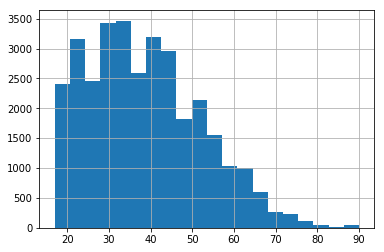

In [26]:
data_subset['age'].hist(bins=20)

In [27]:
def strip_whitespace(value):
    if not type(value) is str: return value
    return value.strip()

data_subset.apply(strip_whitespace)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
5,37,Masters,Exec-managerial
6,49,9th,Other-service
7,52,HS-grad,Exec-managerial
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial


In [28]:
display(data_subset[(data_subset['age']>=30) & (data_subset['age']<50)])

,age,education,occupation
0,39,Bachelors,Adm-clerical
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial
10,37,Some-college,Exec-managerial
11,30,Bachelors,Prof-specialty
13,32,Assoc-acdm,Sales
14,40,Assoc-voc,Craft-repair


In [29]:
byEducationOccupation = data_subset.groupby(['education','occupation' ])
byEducationOccupation.mean()

age
education     occupation                   
 10th          ?                  33.656863
               Adm-clerical       41.631579
               Craft-repair       40.623529
               Exec-managerial    50.041667
               Farming-fishing    40.727273
               Handlers-cleaners  31.957746
               Machine-op-inspct  39.405941
               Other-service      32.479381
               Priv-house-serv    35.166667
               Prof-specialty     36.444444
               Protective-serv    39.833333
               Sales              33.827160
               Tech-support       36.000000
               Transport-moving   45.619048
 11th          ?                  32.252101
               Adm-clerical       31.776119
               Craft-repair       34.354286
               Exec-managerial    44.235294
               Farming-fishing    36.567568
               Handlers-cleaners  27.560976
               Machine-op-inspct  39.373737
               Other-service      30.521008
               Priv-house-serv    30.285714
               Prof-specialty     26.400000
               Protective-serv    36.000000
               Sales              25.548611
               Tech-support       36.000000
               Transport-moving   38.380435
 12th          ?                  30.975000
               Adm-clerical       31.315789
...                                     ...
 Preschool     Other-service      39.800000
               Priv-house-serv    70.500000
               Prof-specialty     63.000000
 Prof-school   ?                  63.555556
               Adm-clerical       49.444444
               Craft-repair       46.714286
               Exec-managerial    47.288462
               Farming-fishing    54.500000
               Machine-op-inspct  44.000000
               Other-service      47.000000
               Prof-specialty     43.608407
               Protective-serv    46.000000
               Sales              42.611111
               Tech-support       35.428571
               Transport-moving   59.000000
 Some-college  ?                  31.149225
               Adm-clerical       35.010929
               Armed-Forces       26.000000
               Craft-repair       38.467742
               Exec-managerial    41.169511
               Farming-fishing    39.454023
               Handlers-cleaners  29.730337
               Machine-op-inspct  34.867742
               Other-service      30.327785
               Priv-house-serv    39.062500
               Prof-specialty     37.979070
               Protective-serv    37.336634
               Sales              35.287413
               Tech-support       36.201465
               Transport-moving   38.385159

[217 rows x 1 columns]

In [30]:
byOccupation = data_subset.groupby(['occupation' ])
byOccupation.describe()

age                                                    
                     count       mean        std   min   25%   50%   75%   max
occupation                                                                    
 ?                  1843.0  40.882800  20.336350  17.0  21.0  35.0  61.0  90.0
 Adm-clerical       3770.0  36.964456  13.362998  17.0  26.0  35.0  46.0  90.0
 Armed-Forces          9.0  30.222222   8.089774  23.0  24.0  29.0  34.0  46.0
 Craft-repair       4099.0  39.031471  11.606436  17.0  30.0  38.0  47.0  90.0
 Exec-managerial    4066.0  42.169208  11.974548  17.0  33.0  41.0  50.0  90.0
 Farming-fishing     994.0  41.211268  15.070283  17.0  29.0  39.0  52.0  90.0
 Handlers-cleaners  1370.0  32.165693  12.372635  17.0  23.0  29.0  39.0  90.0
 Machine-op-inspct  2002.0  37.715285  12.068266  17.0  28.0  36.0  46.0  90.0
 Other-service      3295.0  34.949621  14.521508  17.0  22.0  32.0  45.0  90.0
 Priv-house-serv     149.0  41.724832  18.633688  17.0  24.0  40.0  57.0  81.0
 Prof-specialty     4140.0  40.517633  12.016676  17.0  31.0  40.0  48.0  90.0
 Protective-serv     649.0  38.953775  12.822062  17.0  29.0  36.0  47.0  90.0
 Sales              3650.0  37.353973  14.186352  17.0  25.0  35.0  47.0  90.0
 Tech-support        928.0  37.022629  11.316594  17.0  28.0  36.0  44.0  73.0
 Transport-moving   1597.0  40.197871  12.450792  17.0  30.0  39.0  49.0  90.0

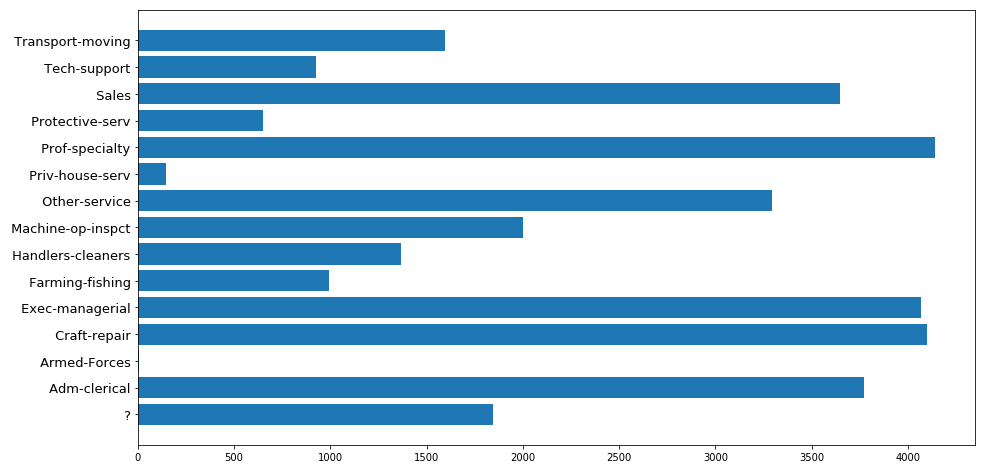

In [31]:
occupation_stats= data_subset.groupby('occupation').describe()['age']
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [32]:
data_1 = data[['age','workclass','occupation']].sample(5,random_state=101)
data_1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [33]:
data_2 = data[['education','occupation']].sample(5,random_state=101)
data_2.head()

,education,occupation
22357,HS-grad,Machine-op-inspct
26009,11th,Sales
20734,HS-grad,Exec-managerial
17695,10th,Handlers-cleaners
27908,7th-8th,Craft-repair


In [34]:
data_merged = pd.merge(data_1,data_2,on='occupation',how='inner').drop_duplicates()
data_merged

,age,workclass,occupation,education
0,51,Private,Machine-op-inspct,HS-grad
1,19,Private,Sales,11th
2,40,Private,Exec-managerial,HS-grad
3,17,Private,Handlers-cleaners,10th
4,61,Private,Craft-repair,7th-8th
